<a href="https://colab.research.google.com/github/HeqingZ/Sept10TrainingPrograms/blob/main/FCOS_R50_1x_1stRun_Sept10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LR 0.0025
Warmup 5000
1x

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install fcos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for fcos: filename=fcos-0.9.8-cp37-cp37m-linux_x86_64.whl size=2776013 sha256=f8023a803b18e1cb703c6d874103067283de6747e1bece265a04e55a2d304bd1
  Stored in directory: /root/.cache/pip/wheels/a6/14/ec/911ce7084df67b170fa4ea3fa6312381f3f60eae5af41d05ad
  Created wheel for pycocotools: filename=pycocotools-2.0.1-cp37-cp37m-linux_x86_64.whl size=265256 sha256=f3326a54083625da2d97e15697cabc878e50e7eeae5ac071dd82b3d858bd3e94
  Stored in directory: /root/.cache/pip/wheels/12/36/32/2bae0d429403617ca371aa0a08b16f8746a09a5f56a3ae5ce1
Successfully built fcos pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successf

In [3]:
!pip install torch
!pip install torchvision
!pip install ninja yacs cython matplotlib tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (108 kB)


In [4]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-11 06:09:54--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   212MB/s    in 0.4s    

2022-09-11 06:09:54 (212 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [6]:
!conda install pytorch torchvision cudatoolkit=10.1.243 -c pytorch


Solving environment: \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1.243
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    certifi-2022.6.15          |   py37h06a4308_0         153 KB
    conda-4.14.0               |   py37h06a4308_0         909 KB
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cytoolz-0.11.0             |   py37h7b6447c_0         328 KB
    ffmpeg-4.3                 |       hf484d3e_0         9.9 MB  pytorch
    freetype-2.11.0            |       h70c0345_0         618 KB
    giflib-5.2.1               |       h7b644

In [7]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 38.23 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [8]:
!pip install numpy
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
%cd /content/cocoapi/PythonAPI
!python setup.py build_ext install

/content/cocoapi/PythonAPI
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /usr/local/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/usr/local/lib/python3.7/site-packages/numpy/core/include -I../common -I/usr/local/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
                                                

In [10]:
!git clone https://github.com/tianzhi0549/FCOS.git
%cd FCOS

Cloning into 'FCOS'...
remote: Enumerating objects: 2102, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2102 (delta 6), reused 10 (delta 5), pack-reused 2090
Receiving objects: 100% (2102/2102), 8.81 MiB | 40.99 MiB/s, done.
Resolving deltas: 100% (1370/1370), done.
/content/cocoapi/PythonAPI/FCOS


In [11]:
!pip install torch
import torch


!python setup.py build develop --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/fcos
copying fcos/fcos.py -> build/lib.linux-x86_64-3.7/fcos
copying fcos/__init__.py -> build/lib.linux-x86_64-3.7/fcos
creating build/lib.linux-x86_64-3.7/fcos_core
copying fcos_core/__init__.py -> build/lib.linux-x86_64-3.7/fcos_core
creating build/lib.linux-x86_64-3.7/fcos_core/solver
copying fcos_core/solver/lr_scheduler.py -> build/lib.linux-x86_64-3.7/fcos_core/solver
copying fcos_core/solver/build.py -> build/lib.linux-x86_64-3.7/fcos_core/solver
copying fcos_core/solver/__init__.py -> build/lib.linux-x86_64-3.7/fcos_core/solver
creating build/lib.linux-x86_64-3.7/fcos_core/utils
copying fcos_core/utils/cv2_util.py -> build/lib.linux-x86_64-3.7/fcos_core/utils
copying fcos_core/utils/c2_model_loading.py ->

In [12]:
#install detectron2
!pip install torch
!pip install torchvision
!pip install ninja yacs cython matplotlib tqdm
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (108 kB)
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 64.1 MB/s 
     |████████████████████████████████| 596 kB 82.3 MB/s 
     |████████████████████████████████| 98 kB 9.2 MB/s 
     |████████████████████████████████| 247 kB 79.3 MB/s 
     |████████████████████████████████| 1.1 MB 73.0 MB/s 
     |████████████████████████████████| 40 kB 6.8 MB/s 
     |████████████████████████████████| 957 kB 74.4 MB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=392143 sha256=5257ed01799078080007cf9de5f0ec2017394e2ee6a3158596eec3364e376dda
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-nud3zgcw
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-nud3zgcw
     |████████████████████████████████| 106 kB 5.2 MB/s 
  Installing build dependencies ... done
  Gett

In [13]:
!pip install jedi
!sudo pip3 install --upgrade pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
     |████████████████████████████████| 100 kB 13.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
  Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [14]:
#import some important utilities of Detectron2
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [15]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
#import features for the bbox
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from detectron2.structures import BoxMode

import os
from pathlib import Path
from ast import literal_eval

import numpy as np
import pandas as pd
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image

from detectron2.data import (DatasetCatalog, 
                             MetadataCatalog, 
                             build_detection_test_loader
                            )
from detectron2.data.datasets.coco import convert_to_coco_json
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.structures import BoxMode
from detectron2.config import get_cfg
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultTrainer, default_setup, hooks
from detectron2.modeling import GeneralizedRCNNWithTTA
from detectron2.evaluation import COCOEvaluator, DatasetEvaluators, inference_on_dataset
 

logger = setup_logger()

DATALOADER 

In [16]:
#define the file path to retrieve images
def FLIR(source_path, img_dir, anno_dir ): #define a function. assuming user doesnt know shit about coding and enter random stuff. related to anno dir and img dir
    img_dir = os.path.join(source_path, img_dir)
    anno_dir = os.path.join(source_path, anno_dir)
    data_dicts = []
    #define annotation properties
    with open(anno_dir) as F:
      jsonfile = json.load(F) #load annotations from json file into the dictionary
    
    annotationinfo = jsonfile["annotations"]
    imagesinfo = jsonfile["images"] #retreieve info like category ID and bbox
   
    #define img sources
     
    img_dir_list = os.listdir(img_dir)#get the list of all files and directories in the specified directory.
    # print(img_dir)
    for img_info in imagesinfo: #bbox info category id
      for images in img_dir_list:  #img_dir_list = img_dir, which is source_path/img_dir(original)
        images = "data/" + images
        if images == img_info['file_name']: #see if name matches each other, because we wanna find the filenames only for the small flir out of the whole json file

          record={}
          filename = os.path.join(source_path, img_info["file_name"])
          # print(filename)
          record["file_name"] = filename
          record["image_id"] = img_info['id']
          record["height"] = img_info['height']
          record['width'] = img_info['width']
        
          box_info = []
          
          for anno in annotationinfo:
            if anno["image_id"] == img_info['id']:
              # if (anno['category_id'] <= 3) & (anno['category_id'] > 0):
              if (anno['category_id'] == 1) & (anno['category_id'] > 0): # Predict people only
                        box = {
                        "bbox": anno['bbox'],
                        'bbox_mode': BoxMode.XYXY_ABS, # Category_id starts from 0 in detectron2
                        'category_id': int(anno['category_id']-1)  #we forcibly convert this shit into integer to be able to minus 1. just incase the stuff from the dict is integer
                        #computer counts from zero but not hyman. we have to substract one to match the computer #update Jun29: i deleted -1, bcz there is no category 0 
                        } #exactly how dictionary looks like
                        imagetesthaha = cv2.imread(filename, 0) 
                        tt = cv2.rectangle(imagetesthaha, anno["bbox"], (255,0,0),2)
                        #cv2_imshow(tt) #for printing all boxes in images one by one, will crash
                        box_info.append(box)
          record["annotations"] = box_info

          data_dicts.append(record)
    return data_dicts

          
    #print(type(jsonfile)) #check the  type of jsonfile. dict or list or stuff

#define dataloader for training and testing sets
#train_dataloader = dataloader(training_data, batch_size=64, shuffle=True)
#test_dataloader = dataloader(test_data, batch_size=64, shuffle=True)


In [17]:
def FLIR_dataset_wrapper(source_path, img_dir, anno_dir):
    def wrapper():
        return FLIR(source_path, img_dir, anno_dir)
    return wrapper

In [ ]:
DatasetCatalog.clear() #unregister stuff

In [18]:
for d in ["train", "val"]:
    DatasetCatalog.register("FLIR_THERMAL_" + d + "_data", lambda d=d: FLIR("/content/drive/MyDrive/FLIR_THERMAL/train", "data", "coco.json")) #changed "/directry/stuff/" +d +"shit" into this rn
    MetadataCatalog.get("FLIR_THERMAL_" + d + "_data").set(thing_classes=["FLIR_THERMAL"])
FLIR_metadata = MetadataCatalog.get("FLIR_THERMAL_train_data")


In [19]:
#to varify our thing by calling the function
dataset_dicts = FLIR("/content/drive/MyDrive/FLIR_THERMAL/train", "data", "coco.json")


In [20]:
!wget https://cloudstor.aarnet.edu.au/plus/s/glqFc13cCoEyHYy/download -O fcos_R_50_1x.pth #download pretrained model

--2022-09-11 06:26:52--  https://cloudstor.aarnet.edu.au/plus/s/glqFc13cCoEyHYy/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=s2efgp36aj7gee8e5dpe9gubjq; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=pzAfGmhVmfbn08ulL7My4xyRJWX5zjZAudRLSIfijEG7s2KnSlNDIH5i2HVpgf%2Fb8KNHymCoV1banhPfXtojbjjM1zQwQgt67CA21z3ivJjbTJjBJIY9drNa3Ww8Lyms; expires=Mon, 12-Sep-2022 06:26:53 GMT; Max-Age=86400; path=/plus;; Secure at position 218.
Length: 129471951 (123M) [application/octet-stream]
Saving to: ‘fcos_R_50_1x.pth’

fcos_R_50_1x.pth    100%[===================>] 123.47M  14.8MB/s    in 9.6s    

2022-09-11 06:27:03 (12.8 MB/s) - ‘fcos_R_50_1x.pth’ saved [129471951/129471951]



In [27]:
from detectron2.engine import DefaultTrainer


cfg = get_cfg()
cfg.DATASETS.TRAIN = ("FLIR_THERMAL_train_data",)
# cfg.MODEL.RESNETS.DEPTH = 50 #for mvit v2 S we are setting the depth = 101. (F)
# cfg.DATASETS.TEST = ('SMALL_FLIR_THERMAL_val_data',)


# cfg.merge_from_file("/content/swin/configs/SwinT/faster_rcnn_swint_T_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "/content/cocoapi/PythonAPI/FCOS/fcos_R_50_1x.pth" 
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 4  # This is the real "batch size" commonly known to deep learning people 'changed to 5'
cfg.SOLVER.BASE_LR = 0.0025 #SET ALL TO 0.0001
cfg.SOLVER.MAX_ITER = 90000    # 270000 for 3x (F)
cfg.SOLVER.STEPS = (60000, 80000)
cfg.SOLVER.WARMUP_FACTOR = 1.0 / 5000
cfg.SOLVER.WARMUP_ITERS = 5000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # chose 512 for 3x
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (people). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
cfg.MODEL.MASK_ON = False
# cfg.MODEL.RESNETS.DEFORM_MODULATED = True
cfg.MODEL.BACKBONE.FREEZE_AT = 0
cfg.OUTPUT_DIR = "/content/drive/MyDrive/FCOS_R50_1x_1stRun_SeptTenth"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2


!cfg.python -m torch.distributed.launch \
    --nproc_per_node=8 \
    --master_port=$((RANDOM + 10000)) \
    tools/train_net.py \
    --skip-test \
    --config-file /content/cocoapi/PythonAPI/FCOS/fcos/configs/fcos_R_50_FPN_1x.yaml \
    DATALOADER.NUM_WORKERS 2 \
    OUTPUT_DIR /content/drive/MyDrive/FCOS_R50_1x_1stRun_SeptTenth


# # load pretrained weights
# other_weights = torch.load('/content/swin_tiny_patch4_window7_224_d2.pth')['model']
# cfg.self_weight = trainer.model.state_dict()
# # for name, param in self_weight.items():
# #     if name in other_weights:
# #         if other_weights[name].shape == param.shape:
# #             self_weight[name] = other_weights[name]
# #         else:
# #             print(f"size mismatch at {name}")
# #     else:
# #         print(f"layer {name} does not exist")
# cfg.trainer.model.load_state_dict(self_weight)


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

/bin/bash: cfg.python: command not found
[09/11 06:41:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenB

backbone.res2.0.conv1.norm.{bias, weight}
backbone.res2.0.conv1.weight
backbone.res2.0.conv2.norm.{bias, weight}
backbone.res2.0.conv2.weight
backbone.res2.0.conv3.norm.{bias, weight}
backbone.res2.0.conv3.weight
backbone.res2.0.shortcut.norm.{bias, weight}
backbone.res2.0.shortcut.weight
backbone.res2.1.conv1.norm.{bias, weight}
backbone.res2.1.conv1.weight
backbone.res2.1.conv2.norm.{bias, weight}
backbone.res2.1.conv2.weight
backbone.res2.1.conv3.norm.{bias, weight}
backbone.res2.1.conv3.weight
backbone.res2.2.conv1.norm.{bias, weight}
backbone.res2.2.conv1.weight
backbone.res2.2.conv2.norm.{bias, weight}
backbone.res2.2.conv2.weight
backbone.res2.2.conv3.norm.{bias, weight}
backbone.res2.2.conv3.weight
backbone.res3.0.conv1.norm.{bias, weight}
backbone.res3.0.conv1.weight
backbone.res3.0.conv2.norm.{bias, weight}
backbone.res3.0.conv2.weight
backbone.res3.0.conv3.norm.{bias, weight}
backbone.res3.0.conv3.weight
backbone.res3.0.shortcut.norm.{bias, weight}
backbone.res3.0.shortcut.w

[09/11 06:52:40 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/11 06:52:55 d2.utils.events]:  eta: 8:09:28  iter: 19  total_loss: 139.2  loss_cls: 32.92  loss_box_reg: 45.21  loss_rpn_cls: 11.37  loss_rpn_loc: 26.09  time: 0.3379  data_time: 0.0171  lr: 9.9981e-06  max_mem: 10358M
[09/11 06:53:03 d2.utils.events]:  eta: 9:45:19  iter: 39  total_loss: 25.97  loss_cls: 10.4  loss_box_reg: 12.12  loss_rpn_cls: 1.039  loss_rpn_loc: 2.929  time: 0.3674  data_time: 0.0089  lr: 1.9996e-05  max_mem: 10358M
[09/11 06:53:11 d2.utils.events]:  eta: 9:37:54  iter: 59  total_loss: 6.318  loss_cls: 3.332  loss_box_reg: 1.342  loss_rpn_cls: 0.4956  loss_rpn_loc: 1.681  time: 0.3719  data_time: 0.0086  lr: 2.9994e-05  max_mem: 10358M
[09/11 06:53:19 d2.utils.events]:  eta: 9:31:21  iter: 79  total_loss: 3.181  loss_cls: 0.5609  loss_box_reg: 0.4607  loss_rpn_cls: 0.523  loss_rpn_loc: 1.533  time: 0.3737  data_time: 0.0085  lr: 3.9992e-05  max_mem: 10358M
[09/11 06:53:26 d2.utils.events]:  eta: 9:29:50  iter: 99  total_loss: 2.341  loss_cls: 0.4811  loss_box_r

In [28]:
from detectron2.utils.visualizer import ColorMode

#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # ALL THRESHOLD = 0.5
#Pass the validation dataset
cfg.DATASETS.TEST = ("boardetect_val", )

predictor = DefaultPredictor(cfg)

[09/11 16:20:20 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                         | Shapes                                          |
|:------------------------------------------------|:--------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.res2.0.conv1.*                         | backbone.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.res2.0.conv2.*                         | backbone.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.res2.0.conv3.*                         | backbone.res2.0.conv3.{norm.bias,norm.running_mean,norm.running_var,norm.weig

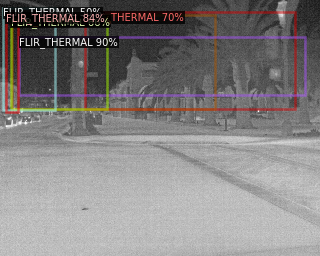

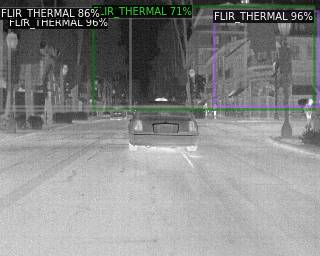

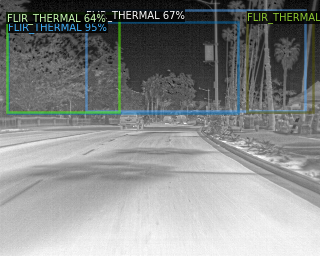

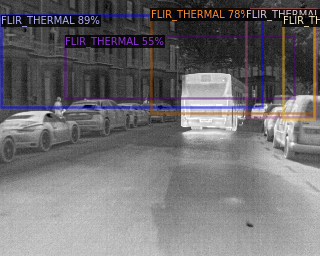

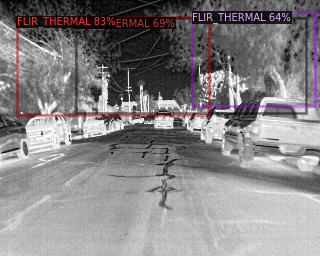

In [29]:
#see if this shit is wroking aka run instance on test images
from detectron2.utils.visualizer import ColorMode
dataset_dicts = FLIR("/content/drive/MyDrive/FLIR_THERMAL/val/", "data", "coco.json")
for d in random.sample(dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=FLIR_metadata, 
                   scale=0.5, 
                      # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [30]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 #ALL THRESHOLD = 0.5 
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("FLIR_THERMAL_train_data", cfg, False, output_dir="content/output/")
val_loader = build_detection_test_loader(cfg, "FLIR_THERMAL_val_data")
inference_on_dataset(trainer.model, val_loader, evaluator)

[09/11 16:21:07 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                         | Shapes                                          |
|:------------------------------------------------|:--------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.res2.0.conv1.*                         | backbone.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.res2.0.conv2.*                         | backbone.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.res2.0.conv3.*                         | backbone.res2.0.conv3.{norm.bias,norm.running_mean,norm.running_var,norm.weig

OrderedDict([('bbox',
              {'AP': 9.884642313114111e-06,
               'AP50': 3.397451856748209e-05,
               'AP75': 0.0,
               'APs': 0.0,
               'APm': 1.7159428247850782e-05,
               'APl': 9.936955453452925e-06})])